# Exploratory Data Analysis
Author: Diana Hilleshein  
Data souse: <https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset>

In this project I perform exploratory data analysis on Groceries Data using Phyton(Spyder) and JupiterLab.

## Data description

In [67]:
###data processing
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
df = pd.read_csv("Groceries_dataset.csv")
df.info() #38765 obs, 3 cols
df.head()
#NAs
df.isnull().sum() # no NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Member_number      0
Date               0
itemDescription    0
dtype: int64

The dataset provided on the kaggle website was loaded in 2020. It contains 38765 observations and tree columns:
 1. Member_number (int) - unique number of customer;
 2. itemDescription (obj) - category of the item in string format;
 3. Date (obj) - day, month and year of purchase.
 
Firstly, I change types of columns:
 1. Member_number: from int to str, since treating Member_number as numeric value does not make sense;
 2. itemDescription: from obj to str;
 3. Date: from obj to datetime.

In [68]:
#transformations
df.Member_number = df.Member_number.astype("string")
df.itemDescription = df.itemDescription.astype("string")
df.Date = pd.to_datetime(df.Date, dayfirst = True)
#duplicates
df[df.duplicated(keep=False)].sort_values(by='Member_number')
#descriptive
df.describe()

<ipython-input-68-1d792018b4ba>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Member_number,Date,itemDescription
count,38765,38765,38765
unique,3898,728,167
top,3180,2015-01-21 00:00:00,whole milk
freq,36,96,2502
first,NaN,2014-01-01 00:00:00,NaN
last,NaN,2015-12-30 00:00:00,NaN


## Time series analysis

### Plot 1. Summ of items sold in 2014 and 2015

In [69]:
#data transformation
from datetime import datetime as dt
df["Weekday"], df["Day"], df["Month"], df["Year"] = df.Date.dt.strftime("%A"), df.Date.dt.strftime("%d"), df.Date.dt.strftime("%m"), df.Date.dt.strftime("%Y")
df = df.sort_values(by = "Date")
df.head()
df.set_index('Date',inplace=True)
df_year_resampled_item_count = df.resample('Y')[['itemDescription']].count()

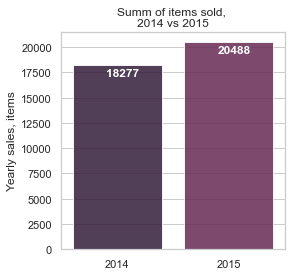

In [70]:
#style
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [4, 4]})
ax = sns.barplot(x = df_year_resampled_item_count.index, 
                 y = df_year_resampled_item_count.itemDescription,
                 alpha = 0.85)
ax.set_xticklabels([2014, 2015])
plt.title("Summ of items sold, \n2014 vs 2015")
plt.ylabel("Yearly sales, items")
plt.xlabel("")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()-1100), size=12, color = "white", weight = "bold")
plt.show()

According to the Plot 1, the number of items sold over year increased in 2015.

In [71]:
print(f"There were {abs(df_year_resampled_item_count.itemDescription[0] - df_year_resampled_item_count.itemDescription[1])} more items sold in 2015.")

There were 2211 more items sold in 2015.


### Plot 2. Items sold per day, 2014 and 2015

In [72]:
#data transformation
#group by date
df_day_resampled_item_count = df.resample('D')[['itemDescription']].count()

<ipython-input-73-f52dbd86425a>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Jan\n2014", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan\n2015", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


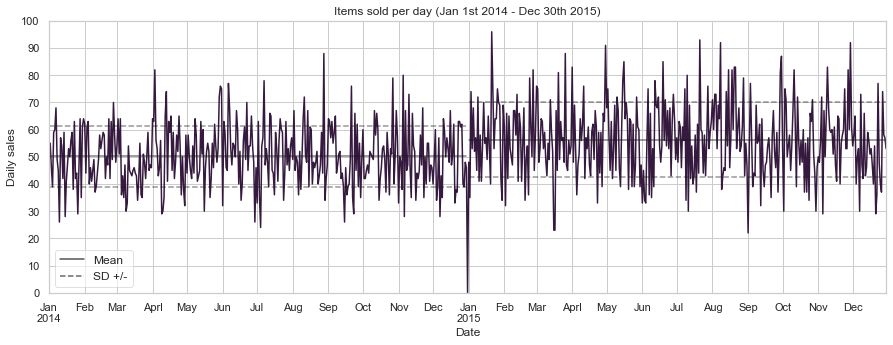

In [73]:
###Plot items sold per day, 2014 + 2015
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator
#style
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [30, 10]})
ax = df_day_resampled_item_count.plot(kind='line',figsize=(15,5),legend=None)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.set_ylim([0, df_day_resampled_item_count["itemDescription"].max()+4])
#mean and sds
#2014
from datetime import timedelta
x1, y1 = [df_day_resampled_item_count.index.min(), 
          df_day_resampled_item_count.index.mean()-timedelta(days=1)], [df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.mean(), df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.mean()]
mean1 = plt.plot(x1, y1, color = "k", alpha = 0.55)
#
x1, y1 = [df_day_resampled_item_count.index.min(), 
          df_day_resampled_item_count.index.mean()-timedelta(days=1)], [df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.mean() + df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.std(), df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.mean() + df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.std()]
sd1pos = plt.plot(x1, y1, color = "k", alpha = 0.45, linestyle = "--")
#
x1, y1 = [df_day_resampled_item_count.index.min(), 
          df_day_resampled_item_count.index.mean()-timedelta(days=1)], [df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.mean() - df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.std(), df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.mean() - df_day_resampled_item_count[df_day_resampled_item_count.index < df_day_resampled_item_count.index.mean()].itemDescription.std()]
sd1neg = plt.plot(x1, y1, color = "k", alpha = 0.45, linestyle = "--")
#2015
x2, y2 = [df_day_resampled_item_count.index.mean()+timedelta(days=1), df_day_resampled_item_count.index.max()], [df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.mean(), df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.mean()]
mean2 = plt.plot(x2, y2, color = "k", alpha = 0.55)
#
x1, y1 = [df_day_resampled_item_count.index.mean()+timedelta(days=1), df_day_resampled_item_count.index.max()], [df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.mean() + df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.std(), df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.mean() + df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.std()]
sd2pos = plt.plot(x1, y1, color = "k", alpha = 0.45, linestyle = "--")
#
x1, y1 = [df_day_resampled_item_count.index.mean()+timedelta(days=1), df_day_resampled_item_count.index.max()], [df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.mean() - df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.std(), df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.mean() - df_day_resampled_item_count[df_day_resampled_item_count.index > df_day_resampled_item_count.index.mean()].itemDescription.std()]
sd2neg = plt.plot(x1, y1, color = "k", alpha = 0.45, linestyle = "--")
#legend
from matplotlib.lines import Line2D
line_p1 = Line2D([0,1],[0,1],linestyle='-', color = "k", alpha = 0.75)
dashed_line = Line2D([0,1],[0,1],linestyle='--', color = "k", alpha = 0.65)
plt.legend([line_p1, dashed_line],["Mean", "SD +/-"], 
           fontsize = "medium", framealpha = 0.6, loc= 3)
plt.ylabel("Daily sales")
plt.title("Items sold per day (Jan 1st 2014 - Dec 30th 2015)")
ax.set_xticklabels(["Jan\n2014", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan\n2015", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Judging from the Plot 2, it is impossible to see some specific patterns through two yeas. Nevertheless, an average summ of items sold in 2015 is bigger then average summ of the items sold in 2014, that goes align with the Plot 1 summary.  
Note: Number of items sold per day dropped to zero on Dec 31st 2014. Most likely, the store did not collect data for this day, but Dec 31st 2014 was included to the time plot, while data collected on Dec 31st 2014 and 2015 was not included to calculate mean and SDs.

### Plot 3. Summ of items sold per day of month, 2014 vs 2015

In [74]:
#data transformation
df_grouped_by_day_and_year = df.groupby(["Day", "Year"], as_index = False).agg(
    Purchase = ("itemDescription", "nunique"))

<ipython-input-75-6ef714369fc0>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["1", "", "", "", "5", "", "", "", "", "10", "", "", "", "", "15", "", "", "", "", "20", "", "", "", "", "25", "", "", "", "", "30"])


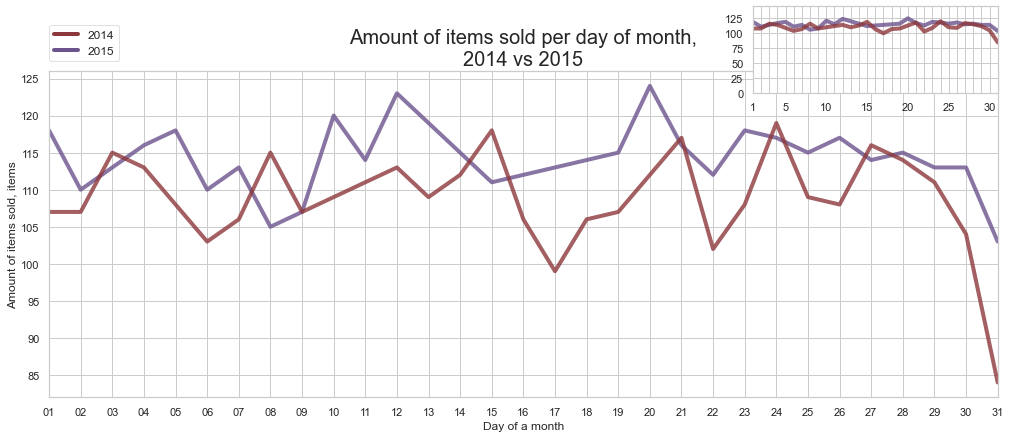

In [75]:
#plot
#style
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [17, 6]})
fig, ax = plt.subplots()
#2014
ax.plot(df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2014"].Day,
        df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2014"].Purchase,
        color = "#6B538C", linewidth = 4, alpha = 0.8)
#2015
ax.plot(df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2015"].Day,
        df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2015"].Purchase,
        color = "#8C373B", linewidth = 4, alpha = 0.8)
#legend
line2014 = Line2D([0,1],[0,1],linestyle='-', color = "#6B538C", alpha = 1, linewidth = 4)
line2015 = Line2D([0,1],[0,1],linestyle='-', color = "#8C373B", alpha = 1, linewidth = 4)
plt.legend([line2015, line2014],["2014", "2015"], 
           fontsize = "medium", framealpha = 0.6, bbox_to_anchor=(0.08,1.160))
plt.ylabel("Amount of items sold, items")
plt.xlabel("Day of a month")
plt.title("Amount of items sold per day of month,\n2014 vs 2015", size = 20)
plt.xlim([0,30])
#small plot
ax2 = fig.add_axes([.70, 0.83, .20, .20]) #[left, bottom, width, height]
ax2.plot(df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2014"].Day,
        df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2014"].Purchase,
        color = "#6B538C", linewidth = 4, alpha = 0.8)
#2015
ax2.plot(df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2015"].Day,
        df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2015"].Purchase,
        color = "#8C373B", linewidth = 4, alpha = 0.8)
ax2.yaxis.set_major_locator(MultipleLocator(25))
ax2.set_xticklabels(["1", "", "", "", "5", "", "", "", "", "10", "", "", "", "", "15", "", "", "", "", "20", "", "", "", "", "25", "", "", "", "", "30"])
plt.xlim([0,30])
plt.ylim([0,df_grouped_by_day_and_year[df_grouped_by_day_and_year["Year"] == "2014"].Purchase.max() + 20])
plt.show()

In the Plot 3, items sold per each same day of a month were summed. There are no obvious patterns revealed in the Plot 3. As pictured on the plot, amount of items purchased on 31st declines that is cased by different number of days in month since number of days usually vary from 30 to 31.

### Plot 4. Summ of items sold per month, 2014 vs 2015

In [76]:
#data transformation
df_grouped_by_month_and_year = df.groupby(["Month", "Year"]).agg({"itemDescription": "count"}).reset_index()
monthly2014 = df_grouped_by_month_and_year[df_grouped_by_month_and_year["Year"] == "2014"][["Month", "itemDescription"]]
monthly2015 = df_grouped_by_month_and_year[df_grouped_by_month_and_year["Year"] == "2015"][["Month", "itemDescription"]]

<ipython-input-77-724b2d3adb5d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Jan", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
<ipython-input-77-724b2d3adb5d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["Jan", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


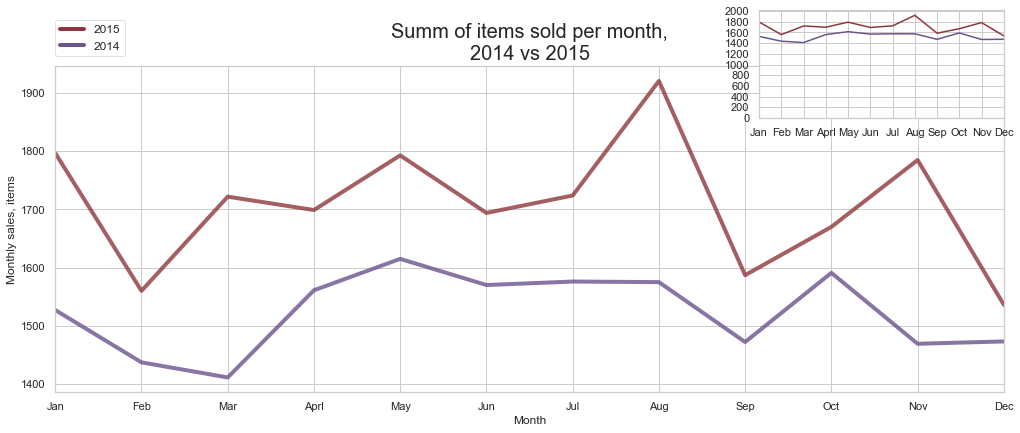

In [77]:
#style
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [17, 6]})
#big plot
fig, ax = plt.subplots()
ax.plot(monthly2014.Month, monthly2014.itemDescription, color = "#6B538C", linewidth = 4, alpha = 0.8)
ax.plot(monthly2015.Month, monthly2015.itemDescription, color = "#8C373B", linewidth = 4, alpha = 0.8)
ax.set_xlim([monthly2014.Month.min(), monthly2014.Month.max()])
ax.yaxis.set_major_locator(MultipleLocator(100))
plt.ylabel("Monthly sales, items")
plt.xlabel("Month")
plt.title("Summ of items sold per month,\n2014 vs 2015", size = 20)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
#legend
line2014 = Line2D([0,1],[0,1],linestyle='-', color = "#6B538C", alpha = 1, linewidth = 4)
line2015 = Line2D([0,1],[0,1],linestyle='-', color = "#8C373B", alpha = 1, linewidth = 4)
plt.legend([line2015, line2014],["2015", "2014"], fontsize = "medium", framealpha = 0.6, bbox_to_anchor=(0.08,1.160))
#small plot
ax2 = fig.add_axes([.70, .76, .2, .25]) #[left, bottom, width, height]
ax2.plot(monthly2014.Month, monthly2014.itemDescription, color = "#6B538C")
ax2.plot(monthly2015.Month, monthly2015.itemDescription, color = "#8C373B")           
ax2.set_ylim(0, monthly2015.itemDescription.max() + 100)
ax2.set_xlim([monthly2014.Month.min(), monthly2014.Month.max()])
ax2.yaxis.set_major_locator(MultipleLocator(200))
ax2.set_xticklabels(["Jan", "Feb", "Mar", "Aprl", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

In the Plot 4, items sold per month were summed. According to the plot, sales increase in January, May and October. It would be possible to perform more in-depth analysis and find reasons for the increase in sales if the location of data collection was known. Monthly sales decrease in February and September. Usually a strong or moderate decrease happens after a strong or moderate increase.

## Items variable analysis

In [78]:
# unique items 2014 vs 2015
df.groupby("Year").agg({"itemDescription": "nunique"}) 

,itemDescription
Year,
2014,167
2015,164


In 2014, there were more categories of items sold. The names of the categories for 2014 and 2015 are the following:

In [79]:
# unique names of items 2014 vs 2015
set_grouped_by_year = df.groupby("Year").agg({"itemDescription": set}) 
set_grouped_by_year

,itemDescription
Year,
2014,"{herbs, sausage, Instant food products, spices..."
2015,"{herbs, sausage, Instant food products, spices..."


### Plot 5. Top 15 items by purchase frequency, 2014 vs 2015

In [80]:
#data transformation
df2014 = df[df.index < '2014-12-31 00:00:00'] #exept 2014-12-31, since the store did not work
df2015 = df[df.index > '2014-12-31 00:00:00']
value_counts_2014 = df2014["itemDescription"].value_counts()
value_counts_2015 = df2015["itemDescription"].value_counts()

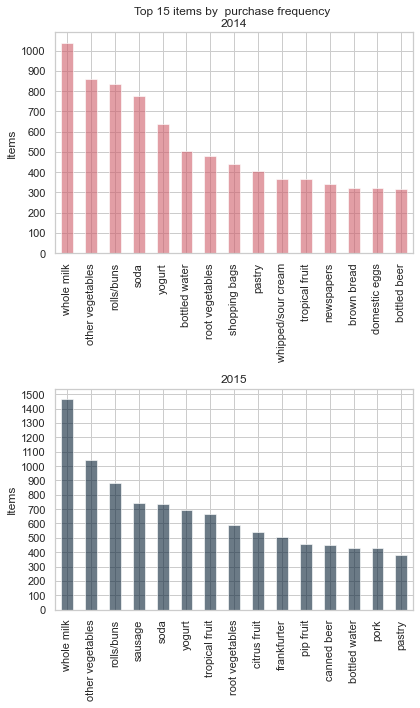

In [81]:
#subplot2015
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [6, 10]})
plt.subplot(2, 1, 1)
ax1 = value_counts_2014.nlargest(15).plot.bar(color = "#CF5D6A", alpha = 0.6)
ax1.yaxis.set_major_locator(MultipleLocator(100))
plt.title("Top 15 items by  purchase frequency \n2014")
plt.tight_layout()
plt.ylabel("Items")
#subplot2014
plt.subplot(2, 1, 2)
ax2 = value_counts_2015.nlargest(15).plot.bar(color = "#082136", alpha = 0.6)
ax2.yaxis.set_major_locator(MultipleLocator(100))
plt.ylabel("Items")
plt.title("2015")
plt.tight_layout()
plt.show()

Such categories as "whole milk", "other vegetables", "rolls/buns", "soda", "yogurt", "root vegetables", "pastry", "tropical fruit" are among top 15 in both 2014 and 2015.

### Change in items' purchase frequency from 2014 to 2015

#### Plot 6.1. Increase in items' purchase frequency from 2014 to 2015

In [82]:
#data transformation
value_counts_2014 = pd.DataFrame(value_counts_2014)
value_counts_2015 = pd.DataFrame(value_counts_2015)
value_counts = value_counts_2014.merge(value_counts_2015, 
                                       left_index=True, right_index=True, 
                                       how = 'left' ,indicator=False)
value_counts["Chnage from 2014 to 2015, %"] = value_counts.apply(lambda row: (
    row.itemDescription_y / row.itemDescription_x)*100, axis=1)
value_counts["Change from 2014 to 2015, %v2"] = value_counts.apply(lambda row: (
    row.itemDescription_y / row.itemDescription_x)*100 - 100, axis=1)
value_counts["Chnage from 2014 to 2015"] = value_counts.apply(lambda row: 
                                                              row.itemDescription_y - row.itemDescription_x, axis=1)
value_counts_sorted_perc = value_counts.sort_values("Change from 2014 to 2015, %v2", ascending = False).iloc[:-3,3]

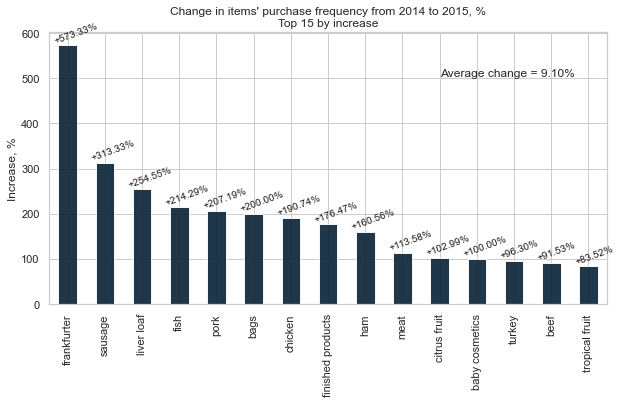

In [83]:
#plot1, increase
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [10, 5]})
ax = value_counts_sorted_perc[:15].plot.bar(color = "#082136", alpha = 0.9)
for p in ax.patches:
        #percentage = '({:.1f}%)'.format(100 * p.get_height()/total)
        ax.annotate('+{:.2f}%'.format(p.get_height()), (p.get_x()-0.15, p.get_height()+5), 
                    size=10, color = "k", rotation = 20)
plt.title("Change in items' purchase frequency from 2014 to 2015, %\nTop 15 by increase")
plt.ylabel("Increase, %")
plt.annotate(f"Average change = {value_counts_sorted_perc.mean():.2f}%", xy = (10, 505))
plt.show()

#### Plot 6.2. Decrease in items' purchase frequency from 2014 to 2015

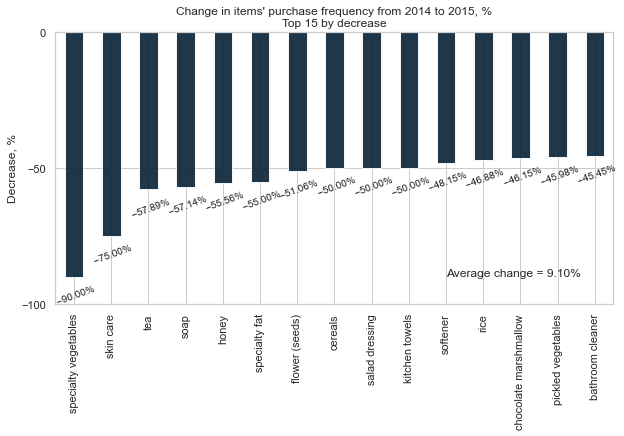

In [84]:
#plot2, decrease
ax2 = value_counts_sorted_perc[len(value_counts_sorted_perc)-15:].sort_values(
    ascending = True).plot.bar(
    color = "#082136", alpha = 0.9)
plt.ylim([value_counts_sorted_perc[len(value_counts_sorted_perc)-15:].sort_values(
    ascending = True).min()-10, 0])
for p in ax2.patches:
        ax2.annotate('-{:.2f}%'.format(p.get_height()), (p.get_x()-0.25, p.get_height()-10), 
                     size=10, color = "k", rotation = 20)
plt.title("Change in items' purchase frequency from 2014 to 2015, %\nTop 15 by decrease")
ax2.yaxis.set_major_locator(MultipleLocator(50))
plt.ylabel("Decrease, %")
plt.annotate(f"Average change = {value_counts_sorted_perc.mean():.2f}%", xy = (10, -90))
plt.show()

In [85]:
#set of items for increase and decrease
print(f"Increase: {list(value_counts_sorted_perc[:15].index)}") #chnage increase
print(f"Decrease: {list(value_counts_sorted_perc[len(value_counts_sorted_perc)-15:].sort_values(ascending = True).index)}") #chnage decr

Increase: ['frankfurter', 'sausage', 'liver loaf', 'fish', 'pork', 'bags', 'chicken', 'finished products', 'ham', 'meat', 'citrus fruit', 'baby cosmetics', 'turkey', 'beef', 'tropical fruit']
Decrease: ['specialty vegetables', 'skin care', 'tea', 'soap', 'honey', 'specialty fat', 'flower (seeds)', 'cereals', 'salad dressing', 'kitchen towels', 'softener', 'rice', 'chocolate marshmallow', 'pickled vegetables', 'bathroom cleaner']


In the plots 6.1 and 6.2, we can see relative increase/decrease in purchase frequency among all items. The change is expressed as percentage change from 2014 to 2015.  
Increase:  
 - There are some significant increase in purchase frequency for "frankfurter" and "sausage" categories. Since "frankfurter" is a type of sausage, we can assume that different types of sausages became more popular among customers.  
 - Interestingly, the categories that dominate in the plot are related to meat products. Therefore, supposedly meat products became more popular choice.  
Decrease:  
 - Among the categories with decreed purchase frequency, there were more nonfood products.  
 
However, benefit of the relative plots provided in this section is debatable since relative change indicate bigger change for categories with initially small number of sold items. So, item that increased from 1 in 2014 to 5 in 2015 will give 400% change. This change could be random and might bring up misleading trend. Therefore, to detect trends, I will choose items that were purchased more than average. Moreover, I also will display change using absolute numbers.

### Adjusted change in items' purchase frequency from 2014 to 2015

In this section, just the items that had purchase frequency above average in 2015 were taken into account to avoid mislead due to relative change values.

#### Plot 7.1. Adjusted increase in items' purchase frequency from 2014 to 2015, absolute values

In [87]:
#data transformatio
adj_change = value_counts.iloc[:,:2]
adj_change = adj_change.dropna()
adj_change_aboveavg = value_counts[value_counts.iloc[:,1]>value_counts.iloc[:,1].mean()]
adj_change_aboveavg = adj_change_aboveavg.sort_values("Chnage from 2014 to 2015", ascending = False)

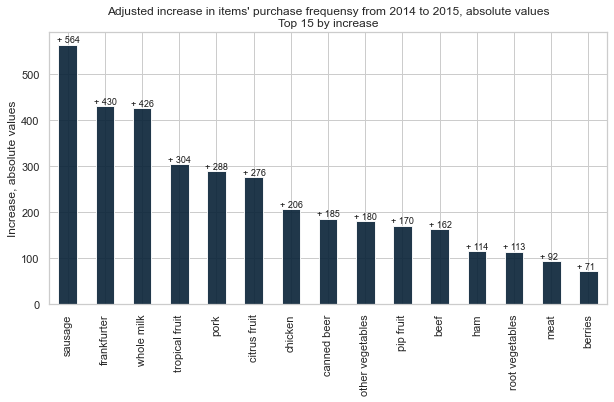

In [88]:
#plot, increase
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [10, 5]})
ax = adj_change_aboveavg.iloc[:15,4].plot.bar(color = "#082136", alpha = 0.9)
for p in ax.patches:
    #percentage = '({:.1f}%)'.format(100 * p.get_height()/total)
    if p.get_height() > 0:
        ax.annotate('+ {}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()+5), 
                    size=9, color = "k")
    else:
        ax.annotate('- {}'.format(p.get_height()), (p.get_x()-0.15, p.get_height()+0.2), 
                    size=9, color = "k")
plt.title("Adjusted increase in items' purchase frequency from 2014 to 2015, absolute values\nTop 15 by increase")
plt.ylabel("Increase, absolute values")
plt.show()

#### Plot 7.2. Adjusted increase in items' purchase frequency from 2014 to 2015, %

In [90]:
#data transformation
adj_change_aboveavg = adj_change_aboveavg.sort_values("Change from 2014 to 2015, %v2", ascending = False)

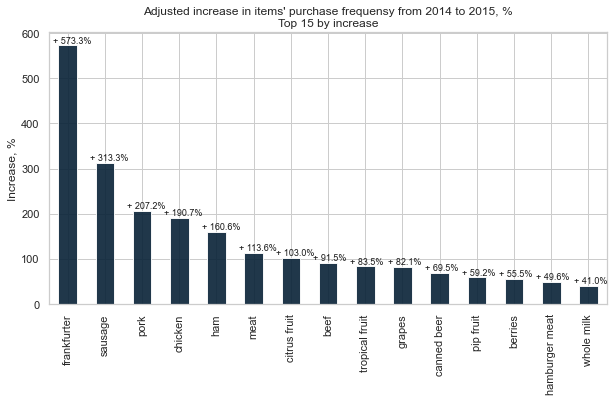

In [92]:
#plot, increase
ax = adj_change_aboveavg.iloc[:15,3].plot.bar(color = "#082136", alpha = 0.9)
for p in ax.patches:
    #percentage = '({:.1f}%)'.format(100 * p.get_height()/total)
    if p.get_height() > 0:
        ax.annotate('+ {:.1f}%'.format(p.get_height()), (p.get_x()-0.15, p.get_height()+5), 
                    size=9, color = "k")
    else:
        ax.annotate('-{:.1f}%'.format(p.get_height()), (p.get_x()-0.15, p.get_height()+0.2), 
                    size=9, color = "k")
plt.title("Adjusted increase in items' purchase frequency from 2014 to 2015, %\nTop 15 by increase")
plt.ylabel("Increase, %")
plt.show()

While "sausage" category leading in absolute values sales, looking at the plot 7.2, we see that "frankfurter" had the biggest increase in popularity among customers. Among items that had increase in purchase frequency, leading positions are occupied by meat products and fruits. Interesting to know that despite big increase in purchase frequency of "whole milk" indicated in absolute values, this increase was just 40%.  

#### Plot 7.3. Adjusted decrease in items' purchase frequency from 2014 to 2015, absolute values

In [93]:
###Decrease
#data transfomation
adj_change_aboveavg = adj_change_aboveavg.sort_values("Chnage from 2014 to 2015", ascending = True)

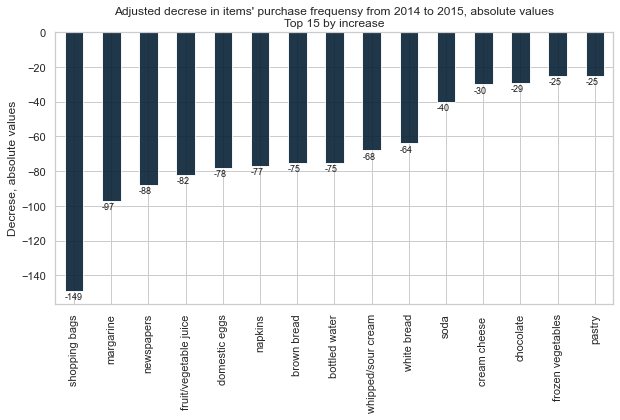

In [94]:
#plot, increase
ax = adj_change_aboveavg.iloc[:15,4].plot.bar(color = "#082136", alpha = 0.9)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()-5), 
                    size=9, color = "k")
plt.title("Adjusted decrese in items' purchase frequency from 2014 to 2015, absolute values\nTop 15 by decrease")
plt.ylabel("Decrese, absolute values")
plt.show()

#### Plot 7.4. Adjusted decrease in items' purchase frequency from 2014 to 2015, %

In [95]:
#data transformation
adj_change_aboveavg = adj_change_aboveavg.sort_values("Change from 2014 to 2015, %v2", ascending = True)

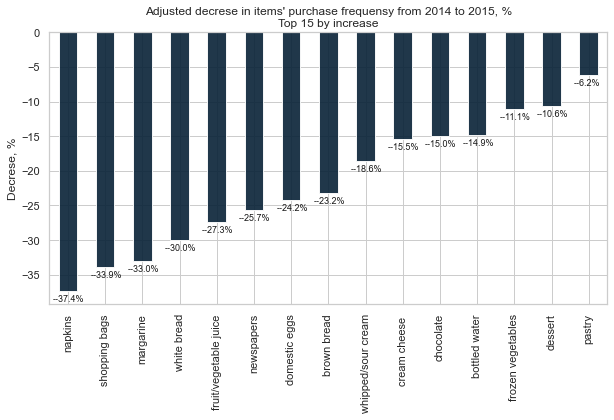

In [96]:
#plot, decrese
ax = adj_change_aboveavg.iloc[:15,3].plot.bar(color = "#082136", alpha = 0.9)
for p in ax.patches:
    #percentage = '({:.1f}%)'.format(100 * p.get_height()/total)
    if p.get_height() > 0:
        ax.annotate('+ {:.1f}%'.format(p.get_height()), (p.get_x()-0.15, p.get_height()-5), 
                    size=9, color = "k")
    else:
        ax.annotate('-{:.1f}%'.format(p.get_height()), (p.get_x()-0.15, p.get_height()-1.5), 
                    size=9, color = "k")
plt.title("Adjusted decrese in items' purchase frequency from 2014 to 2015, %\nTop 15 by decrease")
plt.ylabel("Decrese, %")
plt.show()

Having big decrease indicated in absolute value, "shopping bags" were not included in top 15 categories by relative decrease, that means that the observed decrease over the year in not significant considering the purchased amount of the "shopping bag" item. Nevertheless, average decrease in purchase frequency in moderate for all items.  
Among the items with decreased purchase frequency, there are primarily non food products, cooking components, sweets.

Note for the section: comparing the non-adjusted and adjusted results, we can see that some item categories were falsely included in non-adjusted plots.

## Member number variable analysis

In [99]:
print(f"Unique number of members: {df.Member_number.nunique()}") #3898

Unique number of members: 3898


In [100]:
df_reset_index = df.reset_index()
#description
import sidetable as stb
#count of customers per year
df_reset_index.groupby("Year").agg(dict(Member_number = "count")).stb.subtotal() 

,Member_number
Year,
2014,18277
2015,20488
grand_total,38765


More customers visited the store in 2015 in comparison with 2014.

In [101]:
#unique customers per year
df_reset_index.groupby("Year").agg(dict(Member_number = "nunique")).stb.subtotal() 

,Member_number
Year,
2014,3443
2015,3314
grand_total,6757


Among those who visited the store in 2015, there were less unique customers in comparison with 2014.

### Plot 8. Top 30 customers by purchase amount

In [102]:
#data transformation
grouped_be_year_purc = df_reset_index.groupby("Member_number").agg(Purchased = ("itemDescription", "count"))
grouped_be_year_purc = grouped_be_year_purc.sort_values("Purchased", ascending = False)

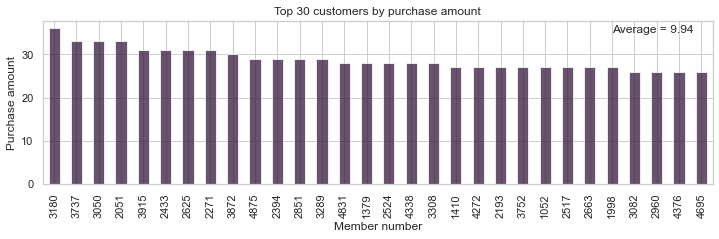

In [103]:
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [12, 3]})
ax = grouped_be_year_purc.iloc[:30,:].plot.bar(legend = False, alpha = 0.75)
plt.title("Top 30 customers by purchase amount")
plt.annotate(f"Average = {grouped_be_year_purc.mean()[0]:.2f}", xy = (25,35), fontsize = 12)
plt.xlabel("Member number")
plt.ylabel("Purchase amount")
plt.show()

In the Plot 8, top 30 unique customers are depicted by number of purchases.

### Plot 9. Amount of unique custmers per weekday

In [104]:
#data transformation
grouped_by_w_y = df.groupby(["Weekday", "Year"], as_index = False).agg(Customer_n = ("Member_number", "nunique"))
grouped_by_w_y["Weekday"] =  pd.Categorical(grouped_by_w_y["Weekday"], 
                                            ['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday", "Sunday"])
grouped_by_w_y = grouped_by_w_y.sort_values("Weekday")

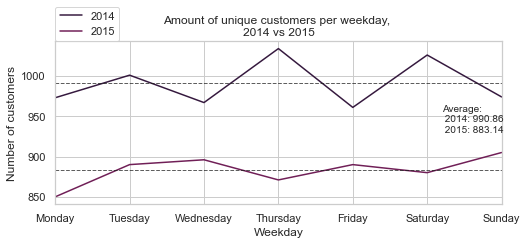

In [105]:
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [8, 3]})
ax = sns.lineplot(x = grouped_by_w_y["Weekday"], y = grouped_by_w_y["Customer_n"], hue = grouped_by_w_y["Year"])
plt.title("Amount of unique customers per weekday, \n2014 vs 2015")
ax.yaxis.set_major_locator(MultipleLocator(50))
grouped_by_w_y["Year"] = grouped_by_w_y["Year"].astype("string")
mean2014 = grouped_by_w_y[grouped_by_w_y["Year"] == "2014"]["Customer_n"].mean()
mean2015 = grouped_by_w_y[grouped_by_w_y["Year"] == "2015"]["Customer_n"].mean()
plt.axhline(mean2014, linewidth = 1, alpha = 0.7, linestyle = "--", color = "k")
plt.axhline(mean2015, linewidth = 1, alpha = 0.7, linestyle = "--", color = "k")
plt.annotate(f"Average:\n 2014: {mean2014:.2f}\n 2015: {mean2015:.2f}", xy = (5.2, 930), fontsize = 10)
plt.ylabel("Number of customers")
plt.legend(loc = (0,1))
plt.xlim(0,6)
plt.show()

In the Plot 9, a number of unique customers visiting the store on certain weekday is summed.  
In average, in 2014, there were more unique customers visiting the store in any given weekday. Also, in the plot, we can observe some patterns. Firstly, customers prefer to not visit the store on Mondays and go shopping on Tuesdays. Secondly, trends for the rest of the weekdays are opposite in 2014 and 2015. For example, on Wednesdays, customers would visit the store more often in 2014, but less often in 2015.

### Plot 10. Amount of purchases by unique custmers per week

In [106]:
#data transformation
grouped_by_w_y_and_item_count = df.groupby(["Weekday", "Year"], as_index = False).agg(
    Customer_n = ("Member_number", "nunique"), Purchases = ("itemDescription", "count"))
grouped_by_w_y_and_item_count["Weekday"] =  pd.Categorical(
    grouped_by_w_y_and_item_count["Weekday"], ['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday", "Sunday"])
grouped_by_w_y_and_item_count.sort_values("Weekday")
grouped_by_w_y_and_item_count["Purchases_per_customer"] = grouped_by_w_y_and_item_count.apply(
    lambda row: row.Purchases / row.Customer_n, axis=1)

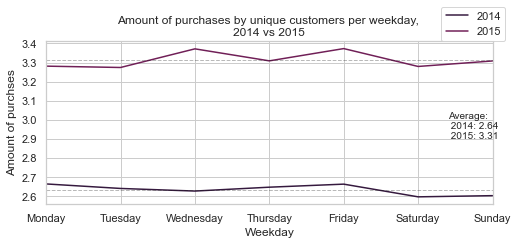

In [107]:
#plot
ax = sns.lineplot(x = grouped_by_w_y_and_item_count["Weekday"], y = grouped_by_w_y_and_item_count["Purchases_per_customer"], hue = grouped_by_w_y["Year"])
plt.title("Amount of purchases by unique customers per weekday, \n2014 vs 2015")
ax.yaxis.set_major_locator(MultipleLocator(0.1))
grouped_by_w_y_and_item_count["Year"] = grouped_by_w_y_and_item_count["Year"].astype("string")
mean2014_per_customer = grouped_by_w_y_and_item_count[grouped_by_w_y_and_item_count["Year"] == "2014"]["Purchases_per_customer"].mean()
mean2015_per_customer = grouped_by_w_y_and_item_count[grouped_by_w_y_and_item_count["Year"] == "2015"]["Purchases_per_customer"].mean()
plt.axhline(mean2014_per_customer, linewidth = 1, alpha = 0.3, linestyle = "--", color = "k")
plt.axhline(mean2015_per_customer, linewidth = 1, alpha = 0.3, linestyle = "--", color = "k")
plt.annotate(f"Average:\n 2014: {mean2014_per_customer:.2f}\n 2015: {mean2015_per_customer:.2f}", xy = (5.4, 2.9), fontsize = 10)
plt.ylabel("Amount of purchses")
plt.legend(loc = (0.885,1))
plt.xlim(0,6)
plt.show()

In the Plot 10, the purchases made by unique customers on certain weekday are summed. Taking into account Plot 1 and Plot 9, we can see that less unique customers visited the store in 2015, but the number of purchases increased. Therefore, we assume that there have been more purchases per one customer that is proved by the Plot 10.